In [80]:
import pandas as pd
import matplotlib
import math
import random
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely import Point
%matplotlib inline

# avoiding Type 3 fonts in matplotlib plots
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=2.0)
matplotlib.rc('lines', markersize=8)

pd.set_option('display.max_rows', 500)

In [81]:
# configure simulation
input_file = 'data/gis_incidences_nona.pkl'
number_of_simulations = 1000
a = 1.03
lk_identifier = 48

# read geo data for map of germany
gis_incidences_nona=pd.read_pickle(input_file)

# set center of chosen LK as starting point
starting_lk_geo = gis_incidences_nona.get('geometry')[lk_identifier]
starting_lk_name = gis_incidences_nona.get('LK')[lk_identifier]
center_of_lk = starting_lk_geo.centroid
center_x = center_of_lk.x
center_y = center_of_lk.y

print("Starting at: " + gis_incidences_nona.get('LK')[lk_identifier] + " with pos: " + str(center_x) + ", " + str(center_y))
# for lk_index in range(0, len(gis_incidences_nona.get('geometry'))):
#     if gis_incidences_nona.get('geometry')[lk_index].contains(Point(center_x, center_y)):
#         print("Really starting at: " + gis_incidences_nona.get('LK')[lk_identifier])

# init infections
infections = [0] * len(gis_incidences_nona.get('LK'))

# simulate movements
i = 0
while i <= number_of_simulations:
    angle = random.uniform(0, 2 * math.pi)
    x = random.uniform(0, 1)
    d = (math.pow(x, (-1 / (a - 1)))) / 110 # convert distance to km, germany is approx. 876km high and 8 units in the current map
    pos_x = center_x + (d * math.cos(angle))
    pos_y = center_y + (d * math.sin(angle))

    for lk_index in range(0, len(gis_incidences_nona.get('geometry'))):
        if (gis_incidences_nona.get('geometry')[lk_index].contains(Point(pos_x, pos_y))
                and starting_lk_name != gis_incidences_nona.get('LK')[lk_index]):
            infections[lk_index] += 1
            i += 1
            break

# create DataFrame
# each row corresponds to one region of germany (called "Kreis")
# column 'LK' is the region name
data = pd.DataFrame({
    "LK": gis_incidences_nona.get('LK'),
    "infections": infections
})

# create GeoDataFrame
# GeoDataFrame https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html
geo_data = gpd.GeoDataFrame(data=data, geometry=gis_incidences_nona.get('geometry'))

geo_data

Starting at: LK Ansbach with pos: 10.478114362410745, 49.246376078585676


,LK,infections,geometry
0,LK Karlsruhe,1,"MULTIPOLYGON (((8.53890 48.95514, 8.53952 48.9..."
1,LK Konstanz,0,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7..."
2,SK Ulm,0,"POLYGON ((10.00016 48.35505, 9.99456 48.35495,..."
3,LK Ravensburg,5,"POLYGON ((10.10504 47.97991, 10.09400 47.97606..."
4,LK Ostalbkreis,36,"POLYGON ((10.42247 48.97927, 10.41675 48.97923..."
5,LK Heidenheim,6,"POLYGON ((10.43222 48.74653, 10.43785 48.74647..."
6,LK Breisgau-Hochschwarzwald,1,"POLYGON ((7.57809 48.11961, 7.58088 48.11875, ..."
7,LK Emmendingen,1,"POLYGON ((7.68154 48.25993, 7.70373 48.26050, ..."
8,SK Freiburg i.Breisgau,0,"POLYGON ((7.84910 48.05642, 7.84930 48.05272, ..."
9,LK Ortenaukreis,1,"POLYGON ((7.96152 48.72008, 7.96340 48.72011, ..."


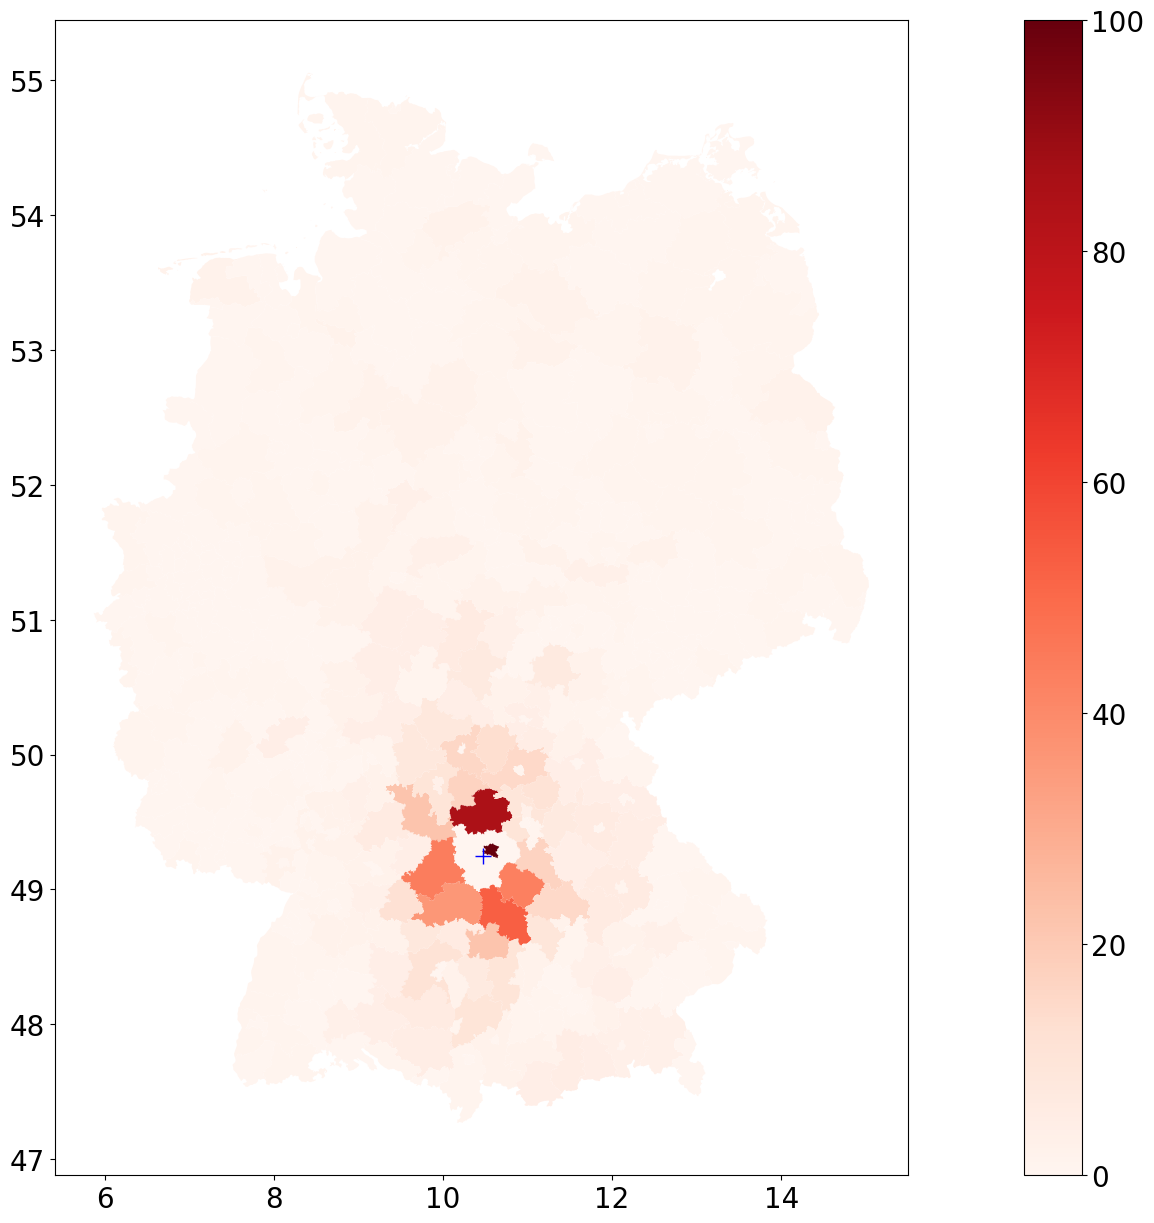

In [82]:
fig, ax = plt.subplots(1, 1,figsize=(30, 15))

# print heatmap
# column 'geometry' of geo_data is used for geometrical shapes
# column 'infections' is used for the number of infections of the corresponding "Kreis"
geo_data.plot(ax=ax, legend=True, cmap='Reds', column='infections')
ax.plot(center_x, center_y, 'b+', markersize=12)
plt.show()